In [44]:
#CHEME 465 Fall 2020
#HW2
#Question#4


In [45]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt


In [46]:
#Reaction given in the problem statement: A -> 2B + 2C #Reaction given in the problem statement
# Data given
F_A0 = 180 #molar flow rate per unit time of the entering reactant A given in mol/min
xA = np.array([0.0, 0.2, 0.4, 0.5, 0.6, 0.8, 0.9]) #conversion of A (nA reacted)/(nA fed)
negative_rA = np.array([2.0, 4.0, 10.0, 12.0, 8.5, 3.5, 3.0]) #rate of disappearance of reactant A in units of mol/(L*min)
print(negative_rA)

[ 2.   4.  10.  12.   8.5  3.5  3. ]


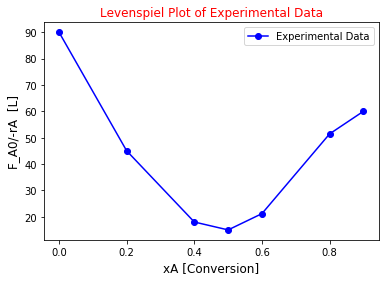

In [47]:
#Part A
#Making a Levenspiel Plot
np.set_printoptions(precision=3)
x1 = xA
y1 = (F_A0)/(negative_rA) #F_A0/-rA = (mol/min)/(mol/(min*L)) = L 

plt.title("Levenspiel Plot of Experimental Data", color='r') 
plt.xlabel("xA [Conversion]", fontsize = 12) 
plt.ylabel("F_A0/-rA  [L]", fontsize = 12) 
plt.plot(x1, y1, 'b-o', label = "Experimental Data")
plt.legend()


In [48]:
#Part b:
#Compute the volume for a CSTR this would require + Compute the volume for a PFR this would require.

xA_desired = 60/100 #Desired condition

#From Data
diff = xA[4] - xA_desired
print("The difference between xA[4] and xA_desired =", diff, ", xA[4]) = xA_desired")

#According to CTSR formula volume you can find the change through this equation: 
V_CTSR = F_A0*xA[4]/negative_rA[4]
print("Volume for a CSTR with ", str(xA_desired), "conversion is:", V_CTSR, "L")

#PFR measures the volume according to the area under the curve of the Levenspiel plot
#To use numpy.trap(), we must define:
x1_PFR = x1[0:5]
y1_PFR = y1[0:5]
# Check: print(x1_PFR)
#Integral of d/dxA [F_A0/neg_rA]:
integral = np.trapz(y1_PFR, x1_PFR) #integrate along the given axis using the composite trapezoidal rule
#According to PFR formula, the volume to achieve the desired condition is:
V_PFR = integral
print("Volume for a PFR with ", str(xA_desired), "conversion is:", V_PFR, "L")

The difference between xA[4] and xA_desired = 0.0 , xA[4]) = xA_desired
Volume for a CSTR with  0.6 conversion is: 12.705882352941176 L
Volume for a PFR with  0.6 conversion is: 23.258823529411764 L


Part c:

In part a, I used the Levenspiel Plot in Figure 2-2B at page 43 (textbook) as a referrence for the formula of y- and x-axis. We can see that the x-axis is the conversion of A with no units just the conversion. The y-axis is initial molar flow rate over the rate of A disappearance. I calculated the units to be in L (liters).
4
In part b, the problem wants calculation for the volume of the reactor given its conversion is 60 percent

Similar to example 2-1 in the textbook page 44, using equation (2-13) to calculate the volume for CSTR reactor. From the 0.6 conversion (xA), we can look up the data for neg_rA on the table to be 8.5. Use the position of xA and neg_rA to link to the wanted values.

For PFR reactor, the volume formula requires an integral. Using recommendation from the problem, I looked up np.trapz and its required values.  its function defined "integrate along the given axis using the composite trapezoidal rule." The required values are: np.trapz(y_array_like, x_arraylike)
yarray_like: Input array to integrate.
xarray_like: The sample points corresponding to the y values.
Given our plot in part a, we integrate along the y-axis of our plot, and define new arrays of x and y until x reaches 0.6.

With 0.6 conversion, the final solutions for part b volume of a CSTR is 12.7 L, volume for a PFR is 23.3 L. The volume of PFR reactor is twice the volume of a CSTR reactor. From the graphs below, the area for PFR volume is bigger than the area of CSTR volume. Which would be consistent with what we have learned

For this problem, if we want to design a reactor at 60 percent conversion with a smaller volume, we should choose the CSTR reactor.

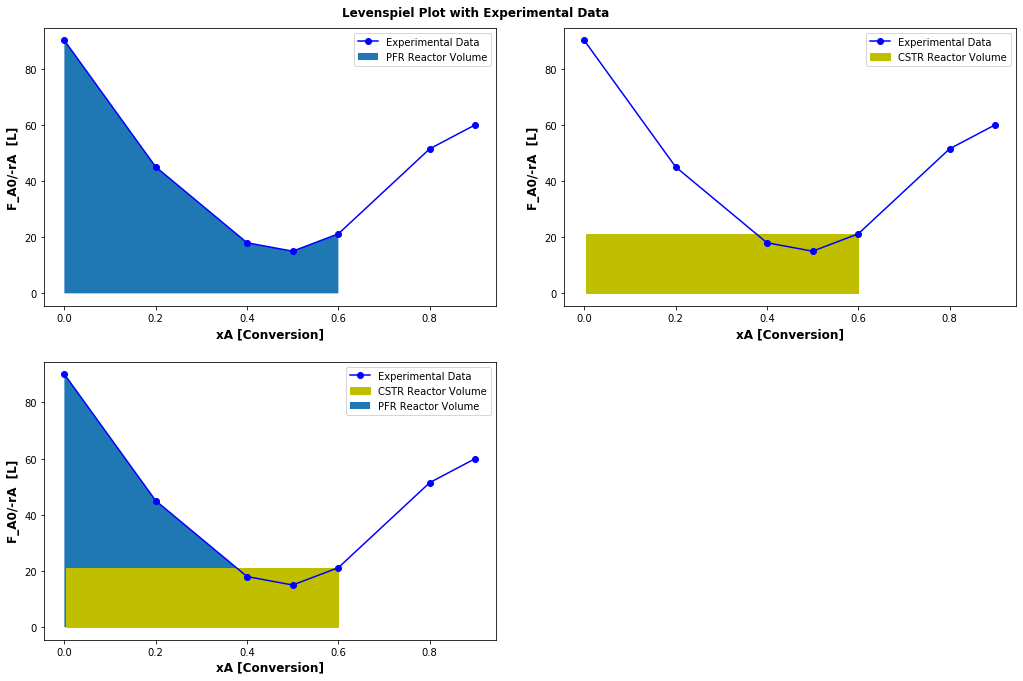

In [49]:
#Part C
plt.figure(figsize=(15, 10))
plt.suptitle("Levenspiel Plot with Experimental Data", fontweight = 'bold') #make plot for all the graphs to go into
plt.subplot(221) #Find prf reactor volume
plt.xlabel("xA [Conversion]", fontweight = 'bold', fontsize = 12) 
plt.ylabel("F_A0/-rA  [L]", fontweight = 'bold', fontsize = 12) 
plt.plot(x1, y1, 'b-o', label = "Experimental Data")
plt.fill_between(x1[0:5], y1[0:5], label = 'PFR Reactor Volume')# highlight the area under the curve
plt.legend()

plt.subplot(222) #Find CSTR Reactor Volume
plt.xlabel("xA [Conversion]", fontweight = 'bold', fontsize = 12) 
plt.ylabel("F_A0/-rA  [L]", fontweight = 'bold', fontsize = 12) 
plt.plot(x1, y1, 'b-o', label = "Experimental Data")
plt.axhspan(0, 21, xmin = 0.05, xmax = 0.65, color = 'y', label ='CSTR Reactor Volume')# highlight the area under the curve
plt.legend()

plt.subplot(223) #find combined PFR, and CSTR Reactor
plt.xlabel("xA [Conversion]", fontweight = 'bold', fontsize = 12) 
plt.ylabel("F_A0/-rA  [L]", fontweight = 'bold', fontsize = 12) 
plt.plot(x1, y1, 'b-o', label = "Experimental Data")
plt.fill_between(x1[0:5], y1[0:5], label = 'PFR Reactor Volume')
plt.legend()
plt.axhspan(0, 21, xmin = 0.05, xmax = 0.65, color = 'y', label ='CSTR Reactor Volume')# highlight the area under the curve
plt.legend()

plt.subplots_adjust(top=.95, bottom=0.1, left=0.10, right=1, hspace=0.2,
                    wspace=0.15) # adjust plots to make look nice
